In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
from keras import models, layers, optimizers, losses
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [3]:
from keras.datasets import cifar10

In [4]:
((xtrain, ytrain),(xtest, ytest)) = cifar10.load_data()

In [8]:
xtrain.shape

(50000, 32, 32, 3)

In [9]:
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [10]:
ytrain.shape

(50000, 1)

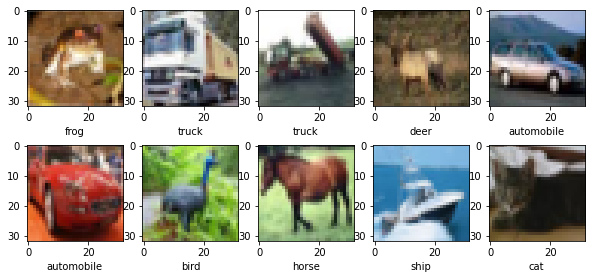

In [17]:
plt.figure(figsize=(10,12))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.imshow(xtrain[i])
    plt.xlabel(labels[ytrain[i][0]])

In [34]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10))

In [35]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 1024)             

In [36]:
model.compile(loss=losses.SparseCategoricalCrossentropy(from_logits=True), optimizer =optimizers.Adam(), metrics=['accuracy'])

In [37]:
H= model.fit(xtrain, ytrain, epochs=5, validation_data=[xtest,ytest])

Epoch 1/5
1563/1563 [==============================] - 27s 17ms/step - loss: 1.7817 - accuracy: 0.3857 - val_loss: 1.4150 - val_accuracy: 0.4813
Epoch 2/5
1563/1563 [==============================] - 27s 17ms/step - loss: 1.3253 - accuracy: 0.5275 - val_loss: 1.2638 - val_accuracy: 0.5537
Epoch 3/5
1563/1563 [==============================] - 29s 18ms/step - loss: 1.1757 - accuracy: 0.5871 - val_loss: 1.2025 - val_accuracy: 0.5775
Epoch 4/5
1563/1563 [==============================] - 29s 18ms/step - loss: 1.0702 - accuracy: 0.6234 - val_loss: 1.1439 - val_accuracy: 0.6077
Epoch 5/5
1563/1563 [==============================] - 29s 18ms/step - loss: 0.9811 - accuracy: 0.6591 - val_loss: 1.1051 - val_accuracy: 0.6205


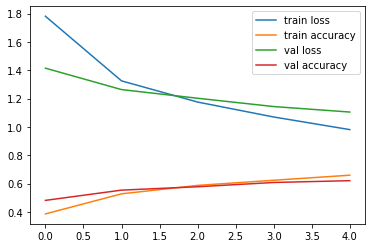

In [39]:
plt.figure()
plt.plot(np.arange(0,5), H.history['loss'], label='train loss')
plt.plot(np.arange(0,5), H.history['accuracy'], label='train accuracy')
plt.plot(np.arange(0,5), H.history['val_loss'], label='val loss')
plt.plot(np.arange(0,5), H.history['val_accuracy'], label='val accuracy')
plt.legend()

1/1 [==============================] - 0s 86ms/step
frog


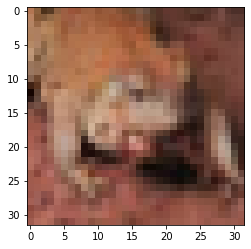

In [42]:
img_number = 5
plt.imshow(xtest[img_number])
arr = np.array(xtest[img_number])
img = arr.reshape(1, 32,32,3)
pred = labels[model.predict(img).argmax()]
print(pred)